In [ ]:
%reset

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import tensorflow as tf
from tensorflow.spectral import dct, idct 
from tensorflow.contrib.framework import argsort

from sklearn.metrics import mean_squared_error

In [5]:
t=np.linspace(1,100,100)
xx=t+50*np.cos(t*2*np.pi/40)
xx=np.expand_dims(xx, axis=0) # For the placeholder


In [6]:
np.shape(xx)

(1, 100)

In [7]:
## Placeholders
x= tf.placeholder(tf.float32, shape=(1,100))

## Dicrete cosine function 
x_dct=dct(x,2, norm='ortho')
x_dct=tf.squeeze(x_dct)

org_x_dct=tf.identity(x_dct)
## We add (-) for sorting the dct coeffs in a descending order and returning 
## the indices for those ordered coeffs. 
indx=argsort(-tf.abs(x_dct))


sess=tf.Session()
sess.run(org_x_dct,{x:xx})


array([ 5.00000580e+02, -2.86568085e+02, -8.41677094e+00, -3.18303890e+01,
       -1.96287804e+01,  3.41012573e+02,  1.60471420e+01, -5.83684349e+00,
        4.52071095e+00, -3.52632713e+00,  2.34712481e+00, -2.35644197e+00,
        1.47649527e+00, -1.68379700e+00,  1.02527440e+00, -1.26159751e+00,
        7.57088184e-01, -9.79533255e-01,  5.83263993e-01, -7.81629980e-01,
        4.63373572e-01, -6.37646079e-01,  3.77119601e-01, -5.29419482e-01,
        3.12815160e-01, -4.45974916e-01,  2.63508826e-01, -3.80517155e-01,
        2.24857271e-01, -3.28075409e-01,  1.93891302e-01, -2.85365343e-01,
        1.68855235e-01, -2.50210673e-01,  1.48090497e-01, -2.20820904e-01,
        1.30738184e-01, -1.96110040e-01,  1.16291694e-01, -1.74992099e-01,
        1.03739776e-01, -1.56965390e-01,  9.30721313e-02, -1.41137064e-01,
        8.37499946e-02, -1.27523288e-01,  7.57415965e-02, -1.15468077e-01,
        6.86897188e-02, -1.05053417e-01,  6.24539964e-02, -9.54139978e-02,
        5.66712506e-02, -

In [13]:
i=tf.constant(0)

In [14]:
def cond(i):
    #a=tf.norm(tf.gather(x_dct, tf.gather(indx, tf.range(i))))
    a=tf.norm(tf.gather(x_dct, indx[0:i]))

    b=tf.norm(x_dct)
    return tf.less(a/b,0.96)


def body(i):
    return tf.add(i,1)



k=tf.while_loop(cond, body, [i])
k=tf.subtract(k,1)  # We should subtract 1 from the output of the loop as i is inceased by 1 before we check the condition. 
sess.run(k, {x:xx})  # This is the number of coefficients (do not bother with the index)


2

In [17]:
# Let us verify that
#a=tf.norm(tf.gather(x_dct, tf.gather(indx, tf.range(res))))
a=tf.norm(tf.gather(x_dct, indx[0:k]))

b=tf.norm(x_dct)
alpha=tf.divide(a,b)

sess.run(alpha, {x:xx})

0.9019783

In [18]:
sess.run(indx[0:k],{x:xx})

array([0, 5], dtype=int32)

Now we keep the coefficients which contribute 90% to the entire energy of the transformed signal while zeroing the other one. 

In [26]:
# See appendix
indices=tf.expand_dims(indx[0:k],-1)

updates=tf.squeeze(tf.gather(x_dct, indices))
ing the signaling the signal
shape = tf.constant([100])

sess.run(updates,{x:xx})
#np.shape(ff)

array([500.00058, 341.01257], dtype=float32)

In [28]:
scatter = tf.scatter_nd(indices, updates, shape)
sess.run(scatter,{x:xx})
#np.shape(ff)

array([500.00058,   0.     ,   0.     ,   0.     ,   0.     , 341.01257,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     , 

## Reconstructed signal

In [31]:
reco_x=idct(scatter,2, norm='ortho')

In [32]:
reco_x

<tf.Tensor 'dct_1/strided_slice:0' shape=(100,) dtype=float32>

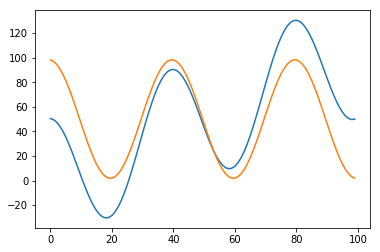

In [36]:
plt.plot(xx[0])
plt.plot(sess.run(reco_x, {x:xx}))
plt.show()

## Mean Squared Error

In [37]:
print('MSE=', mean_squared_error(xx[0],sess.run(reco_x, {x:xx})))

MSE= 839.3835985793984


## Appendix

In [39]:
# How to use scatter
indices = tf.constant([[4], [3], [1], [7]])
updates = tf.constant([9, 10, 11, 12])
shape = tf.constant([8])
    
scatter = tf.scatter_nd(indices, updates, shape)
    
with tf.Session() as sess:
    print(sess.run(scatter))


[ 0 11  0 10  9  0  0 12]


In [ ]:
# How to use while loop

i = tf.constant(0)
c = lambda i: tf.less(i, 10)
b = lambda i: tf.add(i, 1)
r = tf.while_loop(c, b, [i])

sess.run(r)

indx is a tensor. We can use slicing to access its elements as follows: 
indx[0:i] The resulting subtensor is used to access the corresponding dct coefficients but using tf.gather. 

